<a href="https://colab.research.google.com/github/rajni-arora/Deep-Learning-Projects/blob/main/Text_Classification_Using_Bert_with_Spam_and_Not_Spam_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 31.8 MB/s 
     |████████████████████████████████| 511.7 MB 6.6 kB/s 
     |████████████████████████████████| 5.8 MB 54.7 MB/s 
     |████████████████████████████████| 1.6 MB 52.0 MB/s 
     |████████████████████████████████| 438 kB 70.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Unins

In [2]:
!pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [4]:
!wget 'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/47_BERT_text_classification/spam.csv'

--2022-06-17 10:32:20--  https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/47_BERT_text_classification/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480130 (469K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 468.88K  --.-KB/s    in 0.008s  

2022-06-17 10:32:20 (59.6 MB/s) - ‘spam.csv’ saved [480130/480130]



In [5]:
import pandas as pd

df = pd.read_csv('/content/spam.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

Here the dataset is imbalance, and we are using downsampling.

In [7]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
747/4825 

0.15481865284974095

15% are spam emails and 85% are ham emails

In [9]:
df_spam = df[df['Category'] == 'spam']
df_spam.shape

(747, 2)

In [10]:
df_ham = df[df['Category'] == 'ham']
df_ham.shape

(4825, 2)

In [11]:
df_ham.sample(747)

,Category,Message
1910,ham,Then u going ikea str aft dat?
1791,ham,Am not working but am up to eyes in philosophy...
4320,ham,Are you still playing with gautham?
4389,ham,"see you then, we're all christmassy here!"
2449,ham,Do u knw dis no. &lt;#&gt; ?
...,...,...
1214,ham,"Yeah, probably but not sure. Ilol let u know, ..."
432,ham,Does she usually take fifteen fucking minutes ...
4275,ham,Ball is moving a lot.will spin in last :)so ve...
2727,ham,No i am not having not any movies in my laptop


In [12]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

Now concatenate both to make balanced dataframe 

In [13]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [14]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [15]:
df_balanced.sample(5)

,Category,Message
2250,spam,"Thanks for your ringtone order, ref number R83..."
1745,spam,Someone has conacted our dating service and en...
4800,ham,I dont know why she.s not getting your messages
2642,spam,"You are guaranteed the latest Nokia Phone, a 4..."
1752,ham,* Was thinking about chuckin ur red green n bl...


In [16]:
df_balanced.head(10)

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
12,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
19,spam,England v Macedonia - dont miss the goals/team...
34,spam,Thanks for your subscription to Ringtone UK yo...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [17]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [18]:
df_balanced.sample(10)

,Category,Message,spam
401,spam,FREE RINGTONE text FIRST to 87131 for a poly o...,1
34,spam,Thanks for your subscription to Ringtone UK yo...,1
4918,spam,This is the 2nd time we have tried 2 contact u...,1
5014,ham,"Uncle G, just checking up on you. Do have a re...",0
3981,spam,ringtoneking 84484,1
3891,spam,Double Mins & 1000 txts on Orange tariffs. Lat...,1
576,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",1
1598,spam,URGENT! Your Mobile number has been awarded wi...,1
2041,ham,You always make things bigger than they are,0
803,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify = df_balanced['spam'])

In [20]:
X_train.head(4)

2581    U are subscribed to the best Mobile Content Se...
2579    Erm. I thought the contract ran out the4th of ...
8       WINNER!! As a valued network customer you have...
1218    Damn, can you make it tonight or do you want t...
Name: Message, dtype: object

In [21]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [22]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.51327276, -0.88845724, ..., -0.74748844,
        -0.7531474 ,  0.91964495],
       [-0.87208337, -0.5054394 , -0.94446665, ..., -0.85847497,
        -0.71745324,  0.8808295 ]], dtype=float32)>

In [23]:
e = get_sentence_embeding([
                            "banana",
                            "grapes",
                            "mango",
                            "jeff bezos",
                            "elon musk",
                            "bill gates"
])

In [24]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606916 , -0.14219397,  0.49604574, ...,  0.42165306,
        -0.5322139 ,  0.80312157],
       [-0.86023194, -0.21242912,  0.4915695 , ...,  0.39798063,
        -0.60506254,  0.8447163 ],
       [-0.7128858 , -0.15463883,  0.38401723, ...,  0.35278767,
        -0.50991315,  0.73474056],
       [-0.82533485, -0.35550627, -0.5906983 , ..., -0.01613823,
        -0.614176  ,  0.872303  ],
       [-0.75041324, -0.2681263 , -0.26689714, ...,  0.02839372,
        -0.59380966,  0.7974984 ],
       [-0.785443  , -0.29949623,  0.4102765 , ...,  0.52225506,
        -0.4957351 ,  0.81507415]], dtype=float32)>

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]], [e[1]])

array([[0.9911088]], dtype=float32)

In [26]:
#Bert Layers

text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name="text")

preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(l)

# construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [28]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='BinaryAccuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = METRICS)

In [29]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 19s 304ms/step - loss: 0.6327 - BinaryAccuracy: 0.6705 - precision: 0.6819 - recall: 0.6393
Epoch 2/10
35/35 [==============================] - 11s 307ms/step - loss: 0.5153 - BinaryAccuracy: 0.8232 - precision: 0.8007 - recall: 0.8607
Epoch 3/10
35/35 [==============================] - 11s 311ms/step - loss: 0.4526 - BinaryAccuracy: 0.8455 - precision: 0.8342 - recall: 0.8625
Epoch 4/10
35/35 [==============================] - 11s 314ms/step - loss: 0.4075 - BinaryAccuracy: 0.8652 - precision: 0.8508 - recall: 0.8857
Epoch 5/10
35/35 [==============================] - 11s 319ms/step - loss: 0.3761 - BinaryAccuracy: 0.8759 - precision: 0.8713 - recall: 0.8821
Epoch 6/10
35/35 [==============================] - 11s 325ms/step - loss: 0.3466 - BinaryAccuracy: 0.8938 - precision: 0.8731 - recall: 0.9214
Epoch 7/10
35/35 [==============================] - 12s 332ms/step - loss: 0.3267 - BinaryAccuracy: 0.9000 - precision: 0.8889 - recall:

In [30]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 5s 320ms/step - loss: 0.2852 - BinaryAccuracy: 0.9144 - precision: 0.9379 - recall: 0.8877


[0.2852499783039093,
 0.9144384860992432,
 0.9378530979156494,
 0.8877005577087402]

In [35]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten() #Converting 2d to 1d array

12/12 [==============================] - 4s 318ms/step


In [33]:
y_predicted

array([0.84138376, 0.65655553, 0.26424342, 0.84857166, 0.6360417 ,
       0.05821627, 0.57960606, 0.86313945, 0.6768621 , 0.03906588,
       0.01248425, 0.01424655, 0.6270158 , 0.29284775, 0.7644743 ,
       0.5493514 , 0.67308724, 0.5021941 , 0.8618133 , 0.04545732,
       0.45547917, 0.6188571 , 0.88299865, 0.33914647, 0.00761462,
       0.64131683, 0.77558184, 0.03241649, 0.90981734, 0.01994559,
       0.03503384, 0.01517673, 0.5358031 , 0.7975451 , 0.2706095 ,
       0.82611954, 0.01974302, 0.7588913 , 0.8348585 , 0.06756429,
       0.01066596, 0.08761808, 0.46460575, 0.06121065, 0.6552049 ,
       0.03479841, 0.69227386, 0.9236094 , 0.2925764 , 0.8632495 ,
       0.5152752 , 0.7990747 , 0.07152465, 0.4737401 , 0.09827183,
       0.83054984, 0.05973243, 0.64392245, 0.98533547, 0.04785836,
       0.06872541, 0.9143292 , 0.0609776 , 0.03776429, 0.1862042 ,
       0.83061045, 0.89611596, 0.47634766, 0.9226676 , 0.3625252 ,
       0.50812364, 0.04728726, 0.16434105, 0.2555626 , 0.60362

In [36]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0) #If value > 0.5 that is equal to 1
y_predicted

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[176,  11],
       [ 21, 166]])

Text(33.0, 0.5, 'Truth')

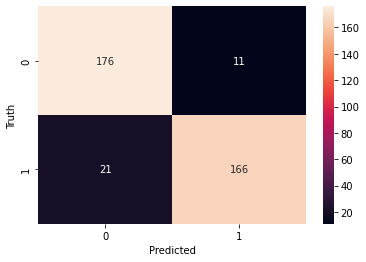

In [44]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       187
           1       0.94      0.89      0.91       187

    accuracy                           0.91       374
   macro avg       0.92      0.91      0.91       374
weighted avg       0.92      0.91      0.91       374



In [46]:
reviews = [
            'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
            'You are awarded a SiPix Digital Cameral! call 0t73218723616 from landline, Dilivery with in 28 days',
            'Hey Richa are you coming for interview today',
            'Can you plese solve my isuue i am getting in my project '
]

model.predict(reviews)

1/1 [==============================] - 1s 1s/step


array([[0.5399154 ],
       [0.68494713],
       [0.04099401],
       [0.03547767]], dtype=float32)